# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [11]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call), sum(data[data.race=='w'].call)

(157.0, 235.0)

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [8]:

# number of callbacks for balck-sounding and white sounding names
sum(data[data.race=='b'].call), sum(data[data.race=='w'].call)

(157.0, 235.0)

In [10]:
# First of all separate the resumes by race: b and w.
df_white=data[data.race=='w']
df_black=data[data.race=='b']

#Number of CV per race:
w_cvs=len(df_white.race)
b_cvs=len(df_black.race)

#Number of calls per race:
w_calls=sum(data[data.race=='w'].call)
b_calls=sum(data[data.race=='b'].call)

# Sample proportions:
w_sample_p = w_calls / w_cvs
b_sample_p = b_calls / b_cvs

w_sample_p,b_sample_p

(0.096509240246406572, 0.064476386036960986)

In [15]:
#total call back
tot_call=sum(data.call)
p_w = w_calls/tot_call
p_b = b_calls/tot_call
p_w , p_b

(0.59948979591836737, 0.40051020408163263)

### 59% of the white sounding ppl got call back and 40% of the black sounding people got call back, therefore 19% of the white sounding ppl got more call backs

### null hypothesis : CLT can be applied H0: there is no difference in call backs from white and black sounding names
### Alternative hypothesis H1: there is a difference between both the groups.

In [27]:
w_call=df_white.call
b_call =df_black.call
stats.ttest_ind(w_call, b_call)

Ttest_indResult(statistic=4.1147052908617514, pvalue=3.9408021031288859e-05)

### Since the p-value is so small, we have to reject the null hypothesis. Therefore alternative hypothesis pertains here. Therefore, people who get call backs depends on the racial background

In [32]:
# margin of error and confidence interval for white sounding names
marginoferror = np.sqrt(p_w*(1-p_w)/len(data))*1.96
confidence_low = p_w-marginoferror
confidence_high = p_w+marginoferror
marginoferror, confidence_low, confidence_high

(0.013762244874422664, 0.58572755104394469, 0.61325204079279005)

In [33]:
# margin of error and confidence interval for black sounding names
marginoferror = np.sqrt(p_w*(1-p_b)/len(data))*1.96
confidence_low = p_b-marginoferror
confidence_high = p_b+marginoferror
marginoferror, confidence_low, confidence_high

(0.016837336286474158, 0.38367286779515847, 0.41734754036810678)

### With 95% confidence, black speaking callers get call within 38 to 42%
### whereas white speaking callers get call back within 58.5 to 61.3%

In [42]:
x = data[["yearsexp","call"]]
y = x[x.yearsexp <= 10]
z = x[x.yearsexp > 10]
y.head()

,yearsexp,call
0,6,0.0
1,6,0.0
2,6,0.0
3,6,0.0
5,6,0.0


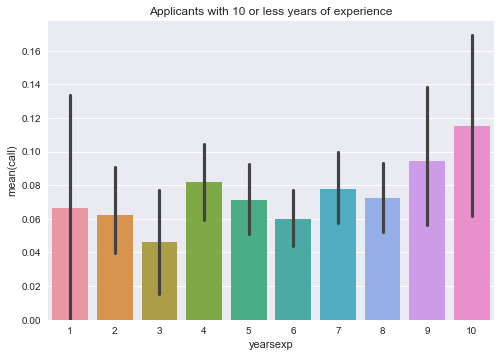

In [50]:
sns.barplot(x="yearsexp",y="call",data=y)
plt.title("Applicants with 10 or less years of experience")
plt.show()



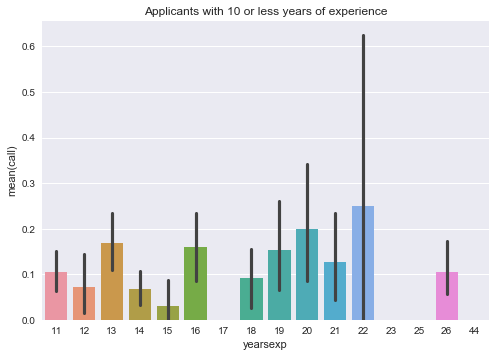

In [51]:
sns.barplot(x="yearsexp",y="call",data=z)
plt.title("Applicants with 10 or less years of experience")
plt.show()

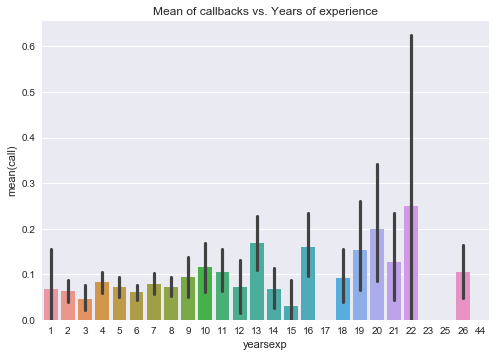

In [53]:

sns.barplot(x="yearsexp",y="call",data=x)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()